Load in data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('no_null_df.csv')

# Drop 'Unnamed: 0' index column

df = df.drop(columns=['Unnamed: 0'])

Separate String Variables that can't be used for Linear Regression. Separate target variable PPR/G 

In [2]:
# Separate String variables that can't be used for Linear Regression

string_variables = ['Player', 'Tm', 'Season', 'PosRank']
X_string_features = df[string_variables]

# Separate target variable PPR/G

y = df['PPR/G']

# Collect data for all variables being used in Linear Regression

X = df.drop(columns=string_variables)
X = X.drop(columns=['PPR/G'])

print(X.dtypes)

Age                         int64
PPR/G_prev                float64
avg_depth_of_target       float64
caught_percent            float64
grades_offense            float64
grades_pass_route         float64
route_rate                float64
slot_rate                 float64
wide_rate                 float64
inline_rate               float64
yprr                      float64
man_grades_pass_route     float64
zone_grades_pass_route    float64
grades_pass               float64
pbe                       float64
Pass Plays/G              float64
Receptions/G              float64
Routes/G                  float64
Targets/G                 float64
TD/G                      float64
YDS/G                     float64
YAC/G                     float64
RZ Targets/G              float64
P_Att/G                   float64
P_Cmp/G                   float64
P_TD/G                    float64
P_Yds/G                   float64
dtype: object


In [3]:
# Standardize data

scaler = StandardScaler()


X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized





,Age,PPR/G_prev,avg_depth_of_target,caught_percent,grades_offense,grades_pass_route,route_rate,slot_rate,wide_rate,inline_rate,...,Routes/G,Targets/G,TD/G,YDS/G,YAC/G,RZ Targets/G,P_Att/G,P_Cmp/G,P_TD/G,P_Yds/G
0,0.167635,2.876666,-0.292945,0.792528,2.169331,2.163448,0.362421,-0.954204,0.917540,-0.158156,...,1.417011,2.416793,2.656451,2.655297,2.495176,3.608297,0.993600,1.290565,1.053506,1.974075
1,-0.189751,2.063927,0.271238,0.255225,2.033668,1.856898,0.579126,-1.115652,1.115038,-0.455532,...,1.342918,2.139391,0.696365,2.658320,2.335221,0.332828,1.348364,1.454471,0.375679,1.469935
2,1.597181,0.934804,0.243029,-0.328397,0.580136,0.314566,-0.287692,0.442102,-0.413425,-0.059031,...,1.145336,1.132795,1.719813,0.613438,0.367075,1.369099,-1.028556,-1.612918,-1.251108,-1.508570
3,-1.619298,0.543434,-0.039063,-0.069009,0.056864,-0.039882,-0.070988,-1.124379,1.145092,-0.455532,...,0.799568,1.068043,-0.253980,0.586776,0.149321,-0.242176,0.017998,-0.723141,-1.386674,-1.406630
4,-1.261911,2.951711,0.243029,0.607251,2.130570,2.163448,0.362421,-0.766575,0.689988,-0.455532,...,1.392313,2.273309,3.547400,2.761091,2.662767,3.659636,0.904909,0.634940,0.646810,0.949113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,-0.904525,-1.298372,0.327656,-1.643863,-0.747424,-0.585925,2.583644,-0.679306,0.707162,-0.455532,...,-1.959516,-1.484606,-0.186099,-1.426041,-1.338818,-0.946263,-1.665045,-0.928368,0.790350,0.678727
1111,0.882408,-0.906291,-0.236527,1.098235,-1.144723,-0.748780,0.199893,-0.173145,0.161895,0.634846,...,-0.886048,-1.050738,-0.907343,-0.825823,-0.699668,-0.550214,0.405109,0.922809,0.024803,-0.174299
1112,-0.189751,-0.977791,-0.716082,0.153323,-1.202865,-1.151127,-0.558573,-0.906206,0.930420,-0.455532,...,-0.911836,-1.119666,-0.365786,-1.076528,-0.987555,-0.749533,-1.214286,-0.884292,-1.506290,-1.934429
1113,-0.189751,-0.582722,0.130192,0.366391,-0.456718,-0.384752,-0.233516,-0.657489,0.685694,-0.455532,...,-0.860876,-1.015786,0.257744,-0.741343,-0.713865,-0.336957,-1.414623,-1.214860,-1.761473,-1.451222


Find number of components to use for PCA

[3.98342946e-01 1.23011826e-01 1.03331005e-01 6.78443777e-02
 4.36417162e-02 4.03664537e-02 3.51823172e-02 3.16967374e-02
 2.91425863e-02 2.73242399e-02 1.93714668e-02 1.77163922e-02
 1.58074081e-02 1.25983778e-02 9.49298204e-03 7.52171419e-03
 4.93182865e-03 3.95079573e-03 3.00008614e-03 2.76176011e-03
 1.27030225e-03 8.52009104e-04 3.13379476e-04 2.74113721e-04
 2.13013587e-04 3.22831840e-05 7.88115016e-06]


Text(0, 0.5, 'Cumulative Explained Variance')

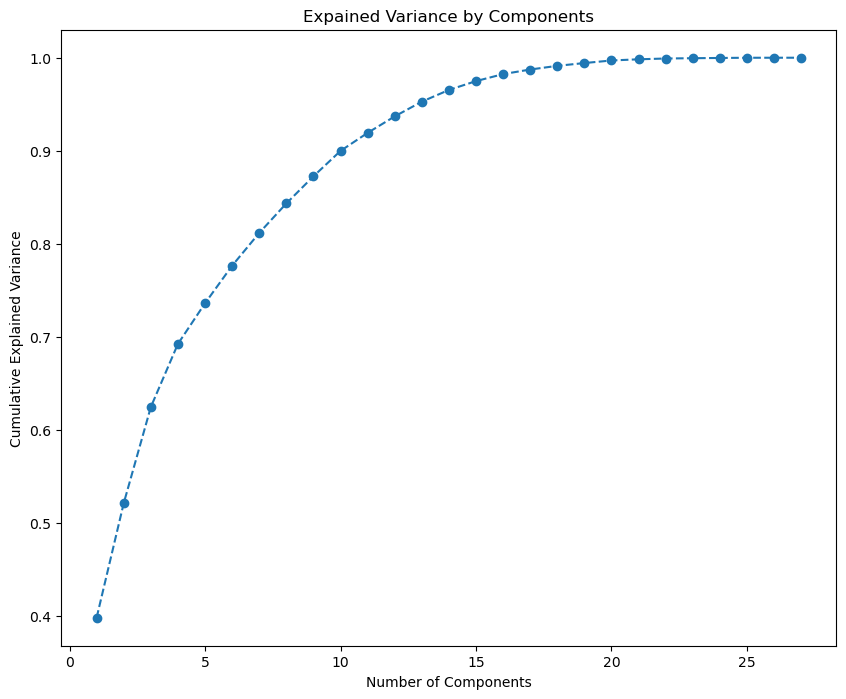

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# PCA

pca = PCA()
pca.fit(X_standardized)
print(pca.explained_variance_ratio_)

plt.figure(figsize=(10,8))
plt.plot(range(1,28), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Expained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Apply PCA with  number of chosen components

In [5]:
pca = PCA(n_components=7)
#X_standardized = pca.fit_transform(X_standardized)

Combine standardized data back with string data

In [55]:
# Combine back with df_string_features

#X_combined = pd.concat([X_standardized, X_string_features.reset_index(drop=True)], axis=1)

Perform Linear Regression

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 12.629027500043666
R^2 Score: 0.6074028637095163


Analyze Results

In [7]:
# Combine predictions with string features for further analysis
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#results_with_strings = pd.concat([results_df, X_string_features.loc[X_test.index].reset_index(drop=True)], axis=1)

print(results_df)

# Get the coefficients (weights) and intercept
coefficients = model.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
feature_names = X_standardized.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print(coefficients_df)

         Actual  Predicted
265   11.250000  11.087551
101   17.112500  12.136913
1045   8.688235   9.189038
792   10.588235  10.940807
902   16.105882  16.165149
...         ...        ...
967    3.618750   3.673302
885    0.642857   6.902797
184    3.387500   5.677687
682    9.800000   6.743633
411    2.700000   3.565743

[223 rows x 2 columns]
                   Feature  Coefficient
0                      Age    -0.654703
1               PPR/G_prev     2.246837
2      avg_depth_of_target     0.021777
3           caught_percent    -0.202043
4           grades_offense    -0.251173
5        grades_pass_route     1.856962
6               route_rate     0.008479
7                slot_rate     2.999479
8                wide_rate     3.086163
9              inline_rate     0.144659
10                    yprr    -0.631055
11   man_grades_pass_route    -0.283939
12  zone_grades_pass_route    -0.419372
13             grades_pass     0.190558
14                     pbe     0.092768
15          